<a href="https://colab.research.google.com/github/yaffka/DP/blob/main/PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruciones de uso:

1. Primero genera una copia en tu drive de este colar así como una hoja de cálculo de Google (spreadsheets).
2. En tu hoja de cálculo introduce las energías libres de Gibbs en el siguiente orden:\begin{array}{|c|c|} \hline \hline
Ox & Red1 & Red2\\ \hline 
&         & H_4Red_2 \\
& H_3Red_1 & H_3Red_2 \\
H_2Ox& H_2Red_1& H_2Red_2 \\
HOx& H_1Red_1& H_1Red_2 \\
Ox& Red_1& Red_2 \\ \hline
\end{array}
>En el caso de tener exactamente las mismas especies, la tabla anterior estaría completa, por otro lado es importante que las especies estén en el orden correcto, es decir que si pones especies por renglón, estas deben solo cambiar un electrón, pero tienen el mismo número de átomos.
3.Ejecuta las celdas con código solo de las funciones.
4.El codigo para llamar las funciones y crear el PD tiene la siguiente estructura:
```
#Ejemplo
root = 'link/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-269, root)
print(pKas)
name="Nombre_del_archivo_del_DP"
potentialf(-269, 4.44, root, pKas)
```
>El *link* lo obtienes de tu hoja de cálculo como si lo fueses a compartir, pero borra la última instrucción "*edit?usp=sharing*" y agrega "*export?format=csv*" y pegalo en la variable "*root*". La variable "*name*" es para ponerle un nombre a la imagen que se genera, es importante cambiarla si vas a generar más de un diagrama, esto para que no sobreescribir. Después solo ejecuta la celda. El -269 kJ/mol ($G(H^+)$) y el 4.4 V ($SHE$) los puedes modificar.
---
Si seguiste los pasos anteriores se genera un DataFrame que contiene los $pK_a$'s en el mismo orden de la tabla de energías de Gibbs. Ejemplo del orden de los $pK_a$'s que genera el código:
\begin{array}{|c|c|} \hline \hline
Ox & Red1 & Red2\\ \hline
       &         & pK_{a,1} \\
       & pK_{a,1}& pK_{a,2}\\
pK_{a,1}& pK_{a,2}& pK_{a,3}\\
pK_{a,2}& pK_{a,3}& pK_{a,4}\\ \hline
\end{array}
La imagen que se genera del Diagrama de Pourbaix  lo puedes encontrar en formato png en la sección de archivos, donde podrás descargarlo (puedes cambiar el formato en el código). También se genera, en la misma sección, un archivo (Potential.dat) que contiene pH's y potenticales de los tres equilibrios generalizados, si los quieres graficar con otra herramienta.
 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [ ]:
def fpKa (G, root):
 df=pd.read_csv(root)
 cols = len(df.axes[1])
 pKas = np.zeros((len(df)-1, cols))
 rows = len(df.axes[0])
 for m in range(cols):
    for i in range(rows-1):
       pKa = ((df.iloc[:, m][i+1]-df.iloc[:, m][i])*627.509+G)/1.364494722
       pKas[i,m] = pKa   
 pKas = pd.DataFrame(pKas)
 return (pKas)

In [ ]:
def style(ax):
   x_fill = [0.0,14.0,14.0,0.0]
   y_fill = [-2, -2, 1.5, 1.5]
   y2_fill = [0,-0.83,0.40,1.23]
   ax.fill(x_fill,y_fill,color='gray',alpha=0.1)
   ax.fill(x_fill,y2_fill,color='gray',alpha=0.1)
   plt.xlim([-1, 15]) 
   plt.ylim([-2, 1.5]) 
   plt.xlabel('pH',fontsize=14)
   plt.xticks(fontsize=14)
   plt.yticks(fontsize=14)
   plt.ylabel('E (V vs SHE)',fontsize=14)
   return()

In [ ]:
def potentialf(G, SHE, root, pKas):
   def find(r, col, NaN, pkai):
     long = len(df.iloc[:,col])
     if r != long-1:
       NaN = str(pKas.iloc[r,col])
       pkai = pKas.iloc[r,col] 
       pkai = round(pkai, 2)

     sum =  df.iloc[r:,col].isnull().sum()
     Dat = r + sum + 1
     if NaN == "nan" and Dat != long:
       r +=1

     if pH == pkai and Dat != long:
       r +=1
     return(r) 
   # Intervalo de pH
   l=[]
   rows = len(pKas.axes[0])
   cols = len(pKas.axes[1])
   #print(rows, cols)

   for i in range(cols):
     k=0
     for k in range(rows):
       #print(k,i)
       m = pKas.iloc[k,i]
       if float(m) == m:
         l.append(m)

   vmax = int(np.max(l)+2)
   vmin = int(np.min(l)-2)
   #print(vmax, vmin)
   # analisis de datos
   df=pd.read_csv(root)
   pH=vmin
   r1=0
   r2=0
   r3=0 
   NaN=0
   pkai=0
   colums = len(df.axes[1])
   
   f=open("Potential.dat", mode="w+")

   p=pKas.to_numpy()
   p=p[np.isfinite(p)]
   
   plt.figure(figsize=(12,8))
   while pH < vmax:
     pH = round(pH,2)
     #print(pH, r1, r2, r3)
     if colums < 3:
       r1 = find(r1, 0, NaN, pkai)
       r2 = find(r2, 1, NaN, pkai)
       m=abs(r2-r1)
       E1 = ((df.iloc[r2,1]-df.iloc[r1,0])*4.3597447222071E-18 -m*G*6.95E-21)/(-1.602176634E-19)-SHE
       EQG1 = E1 - 0.059*m*pH
       EQG1 = round(EQG1,3)
       plt.plot(pH, EQG1, "-" , color="blue", linewidth=3, markersize=0.1)
       print(pH, EQG1 ,file=f)

     else:
       r1 = find(r1, 0, NaN, pkai)
       r2 = find(r2, 1, NaN, pkai)
       r3 = find(r3, 2, NaN, pkai)

       m=abs(r2-r1)
       E1 = ((df.iloc[r2,1]-df.iloc[r1,0])*4.3597447222071E-18 -m*G*6.95E-21)/(-1.602176634E-19)-SHE
       EQG1 = E1 - 0.059*m*pH
       EQG1 = round(EQG1,3)

       m2=abs(r3-r2)
       E2 = ((df.iloc[r3,2]-df.iloc[r2,1])*4.3597447222071E-18 -m2*G*6.95E-21)/(-1.602176634E-19)-SHE
       EQG2 = E2 - 0.059*m2*pH
       EQG2 = round(EQG2, 3)

     
       if EQG1 < EQG2:
          m3=abs(r3-r1)
          E3 = ((df.iloc[r3,2]-df.iloc[r1,0])*4.3597447222071E-18 -m3*G*6.95E-21)/(-2*1.602176634E-19)-SHE
          EQG3 = E3 - 0.059*(m3/2)*pH
          EQG3 = round(EQG3, 3)
          plt.plot(pH, EQG3, "go-"  ,color="magenta", linewidth=3, markersize=1, label="2$e^{-}$")
          print(pH, "NAN",  "NAN", EQG3 ,file=f)
          #Divicion de pKas
          h=0
          for h in range(rows):
            k1=pKas.iloc[h,0]
            k2=pKas.iloc[h,2]
            if k1 != "nan":
              k1=round(k1,2)
              if pH == k1:
                plt.vlines(k1, EQG3, 1.5, ls=':', colors='gray')
                if k1 > 0 and k1 < 15:
                  plt.text(k1,1.4,k1, fontsize=14)
            if k2 != "nan":
              k2=round(k2,2)
              if k2 == pH:
                plt.vlines(k2, EQG3,-2, ls=':', colors='gray')
                if k2 > 0 and k2 < 15:
                  plt.text(k2,-1.9,k2, fontsize=14)

       else:
          plt.plot(pH, EQG1, "go-" ,color="blue", linewidth=3, markersize=1)
          plt.plot(pH, EQG2, "go-" ,color="black", linewidth=3,markersize=1)
          print(pH, EQG1, EQG2, "NAN" ,file=f)
          #Divicion de pKas
          h=0
          for h in range(rows):
            k1=pKas.iloc[h,0]
            k2=pKas.iloc[h,2]
            k3=pKas.iloc[h,1]
            if k1 != "nan":
              k1=round(k1,2)
              if pH == k1:
                plt.vlines(k1, EQG1, 1.5, ls=':', colors='gray')
                if k1 > 0 and k1 < 15:
                  plt.text(k1,1.4,k1, fontsize=14)
            if k2 != "nan":
              k2=round(k2,2)
              if k2 == pH:
                plt.vlines(k2, EQG2,-2, ls=':', colors='gray')
                if k2 > 0 and k2 < 15:
                  plt.text(k2,-1.9,k2, fontsize=14)
            if k3 != "nan":
              k3=round(k3,2)
              if k3 == pH:
                 plt.vlines(k3, EQG1, EQG2, ls=':', colors='gray')
      
     pH = pH +0.01
   f.close()
   style(plt)
   img=plt.savefig( name+'.png',dpi=500, bbox_inches='tight')
   plt.show()
   return (img)

           0          1          2
0        NaN        NaN   3.350695
1        NaN  -3.638159   4.879349
2   8.540484  18.686900  34.711550
3  15.195462        NaN        NaN
4  39.338901        NaN        NaN


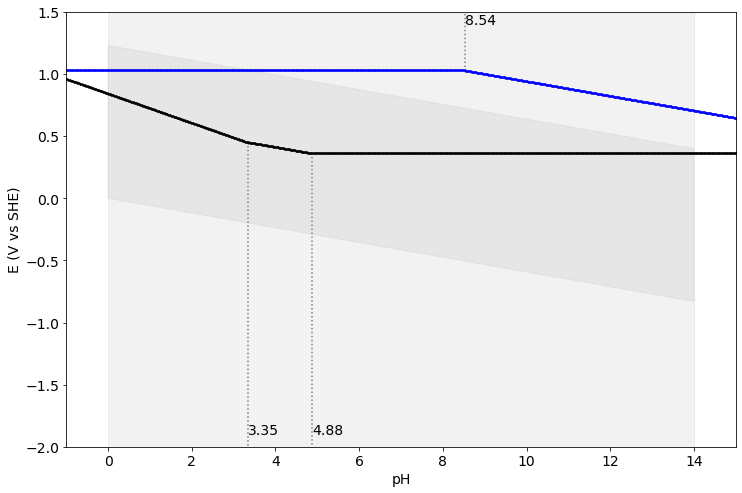

In [ ]:
#Bz
root = 'https://docs.google.com/spreadsheets/d/1RXYDzbcczdA4YfBc2kQRIcwTKKi_2q4dCDbcxksQANI/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-265.6660, root)
print(pKas)

potentialf(-265.6660, 4.25, root, pKas)  


           0          1          2
0 -22.827472  -7.352842   4.501122
1  -9.438875  -0.506093   5.868816
2  -2.555335  12.739480  28.339198


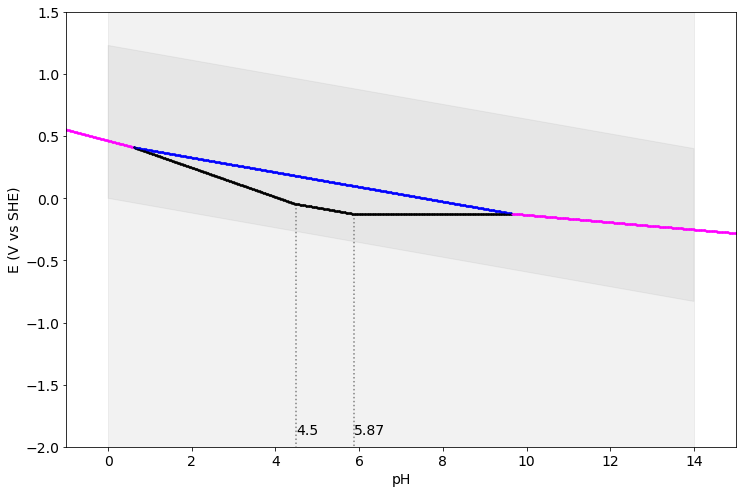

In [ ]:
#MB
root = 'https://docs.google.com/spreadsheets/d/1RXYDzbcczdA4YfBc2kQRIcwTKKi_2q4dCDbcxksQANI/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-269.4238, root)
print(pKas)

potentialf(-269.4238, 4.2025, root, pKas) 

          0          1
0 -0.432296   7.600034
1  5.282220  22.743547


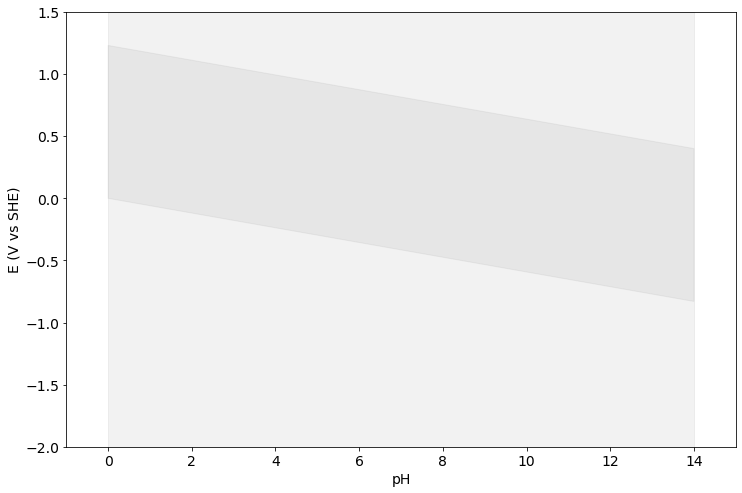

In [ ]:
#Bpy
root = 'https://docs.google.com/spreadsheets/d/1RXYDzbcczdA4YfBc2kQRIcwTKKi_2q4dCDbcxksQANI/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-270.8787, root)
print(pKas)
name="Bpy"
potentialf(-270.8787, 4.08845, root, pKas) 

          0          1          2
0       NaN  -3.904924  12.196527
1       NaN   6.500866  17.738587
2  5.996374  15.742691  26.195390


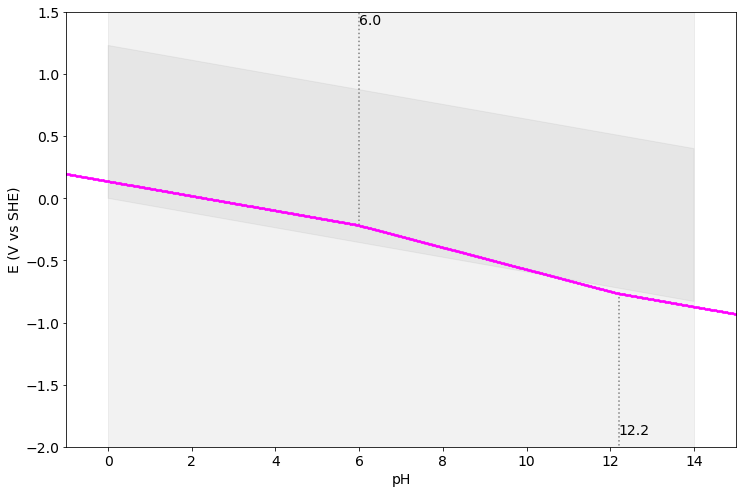

In [ ]:
#Lawsona
root = 'https://docs.google.com/spreadsheets/d/18FojvVJUXm3aEpruaFsVnxvkgj2Qx11co5JRZPb42Zo/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-269, root)
print(pKas)
name="Lawsona"
potentialf(-269, 4.44, root, pKas) 

           0          1          2
0        NaN        NaN  -5.548089
1        NaN        NaN  10.619126
2  -5.518656   3.415966  16.261440
3   4.028531  11.245028  22.252806
4  23.536341  24.455189  26.715058


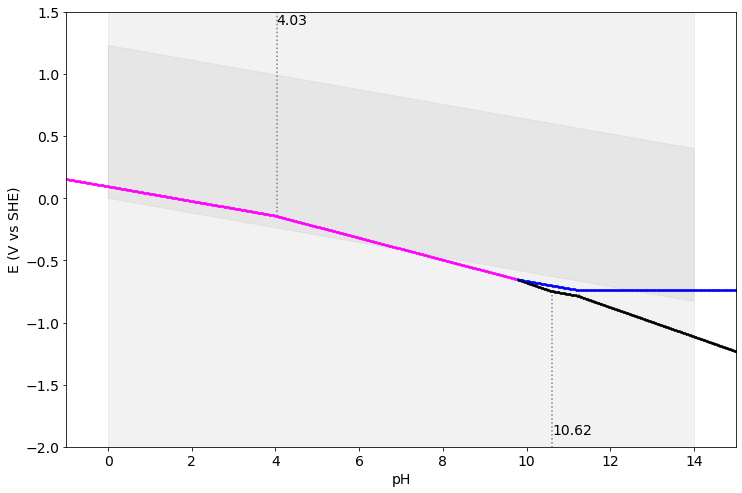

In [ ]:
#Lawsona Derivado IV
root = 'https://docs.google.com/spreadsheets/d/18FojvVJUXm3aEpruaFsVnxvkgj2Qx11co5JRZPb42Zo/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-269, root)
print(pKas)
name="Lawsona_D_IV"
potentialf(-269, 4.44, root, pKas)

          0          1          2
0       NaN        NaN   0.298414
1       NaN   0.119979  13.775308
2  0.459833   5.138691  16.741099
3  6.304496  15.708200  26.690684


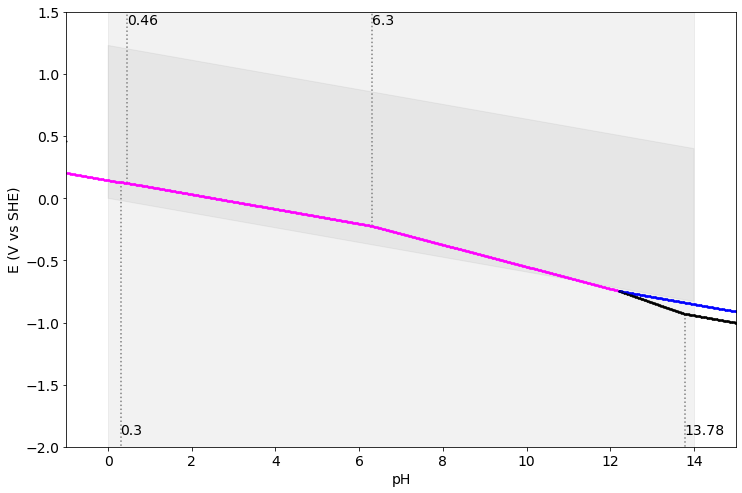

In [ ]:
#Lawsona D1
root = 'https://docs.google.com/spreadsheets/d/18FojvVJUXm3aEpruaFsVnxvkgj2Qx11co5JRZPb42Zo/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-269, root)
print(pKas)
name="Lawsona_D1"
potentialf(-269, 4.44, root, pKas)

           0          1          2
0        NaN        NaN   7.604587
1        NaN   0.543992  13.445112
2   2.520112  13.054670  21.809478
3  15.952858  19.578122  27.888222


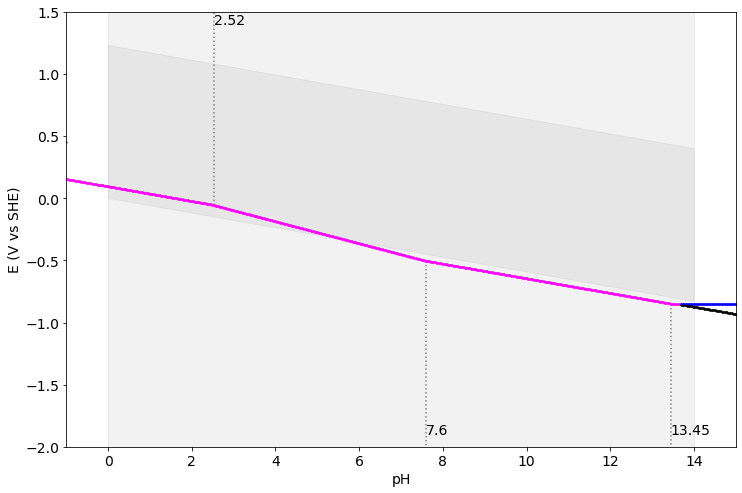

In [ ]:
#Lawsona D2
root = 'https://docs.google.com/spreadsheets/d/18FojvVJUXm3aEpruaFsVnxvkgj2Qx11co5JRZPb42Zo/export?format=csv'
df=pd.read_csv(root)
pKas=fpKa(-269, root)
print(pKas)
name="Lw_D2"
potentialf(-269, 4.44, root, pKas)